## Regresión Logística
# Tablas de contingencia

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/gender-purchase/Gender Purchase.csv")

In [3]:
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [4]:
df.shape

(511, 2)

In [5]:
contingency_table = pd.crosstab(df["Gender"],df["Purchase"])

In [6]:
contingency_table 

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [7]:
contingency_table.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [8]:
contingency_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [9]:
contingency_table.astype("float").div(contingency_table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Probabilidad condicional

* ¿Cuál es la probabilidad de que un cliente compre un producto si es hombre?
* ¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea hombre?

In [11]:
from IPython.display import display, Math, Latex

In [18]:
display (Math(r'P(Purchase|Male) = \frac {Número\ total\ de\ compras\ hechas\ por\ hombres}{Número\ total\ de\ hombres} =  \frac {Compran \cap Hombre}{Hombre}' ))

<IPython.core.display.Math object>

In [20]:
P1 = 121/(121+125)
P1

0.491869918699187

In [24]:
display (Math(r'P(Male|Purchase) = \frac {Número\ total\ de\ compras\ hechas\ por\ hombres}{Número\ total\ de\ compras} =  \frac {Compran \cap Hombre}{Total\ de\ compras}' ))

<IPython.core.display.Math object>

In [25]:
P2 = 121 / (121+ 159)
P2

0.43214285714285716

In [30]:
display (Math(r'P(No\ Purchase|Male) = 1- P(Purchase|Male)'))
1-P1

<IPython.core.display.Math object>

0.5081300813008129

In [31]:
display (Math(r'P(Female | Compra) = 1- P(Male| Compra)'))
1-P2

<IPython.core.display.Math object>

0.5678571428571428

In [38]:
display (Math(r'P(Purchase|Male)' ))
print(121/(121+125))
display (Math(r'P(No\ Purchase|Male)' ))
print(1- 121/(121+125))
display (Math(r'P(Purchase|Female)' ))
print(159/(159+106))
display (Math(r'P(No\ Purchase|Female)' ))
print(1- 159/(159+106))

<IPython.core.display.Math object>

0.491869918699187


<IPython.core.display.Math object>

0.5081300813008129


<IPython.core.display.Math object>

0.6


<IPython.core.display.Math object>

0.4


## Ratio de probabilidades
Cociente entre los casos de éxito sobre los casos de fracaso del suceso en cada grupo

In [64]:
display (Math(r'P_m = probabilidad\ de\ compra\ dado\ hombre ' ))
display (Math(r'odds_{purchase| male} =  \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N_{\bar p , m}} = \frac{hombres\ compran}{hombres\ no\ compran  }' ))
display (Math(r'odds_{purchase| male} \in [0,+\infty] ' ))
display (Math(r'P_f = probabilidad\ de\ compra\ dado\ mujer ' ))
display (Math(r'odds_{purchase| female} =  \frac{P_f}{1-P_f} = \frac{N_{p,f}}{N_{\bar p , f}} = \frac{mujeres\ compran}{mujeres\ no\ compran  }' ))
display (Math(r'odds_{purchase| female} \in [0,+\infty] ' ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
Pm = 121/(121+125)
Pf = 159/(159+106)
Pm, Pf

(0.491869918699187, 0.6)

In [50]:
odds_m = Pm/(1-Pm)
odds_f = Pf/(1-Pf)
odds_m, odds_f

(0.9680000000000002, 1.4999999999999998)

In [51]:
121/125

0.968

In [52]:
159/106

1.5

* Si el ratio es superior a 1 es más probable el éxito que el fracaso (Probabilidad de éxito > Probabilidad de fracaso)
* Si el ratio es inferior a 1 es más probable el fracaso que el éxito (Probabilidad de fracaso > Probabilidad de éxito)


In [67]:
display (Math(r'odds_{ratio} = \frac{odds_{purchase| male}}{odds_{purchase| female}} ' ))

<IPython.core.display.Math object>

In [69]:
odds_r = odds_m/ odds_f
odds_r

0.6453333333333335

## Regresión Logística desde Regresión Lineal

In [75]:
display (Math(r' y = \alpha + \beta \cdot x'))
display (Math(r' (x,y) \in [-\infty, +\infty]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [79]:
display (Math(r'P = probabilidad\ de\ compra\ dado\ hombre \in [0,1]'))
display (Math(r'x = variable\ independiente' ))
display (Math(r' ln(\frac{P}{1-P}) =  \alpha + \beta \cdot x \in [-\infty, +\infty]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
display (Math(r' \frac{P}{1-P} = e^{ \alpha + \beta \cdot x}'))

<IPython.core.display.Math object>

In [86]:
display (Math(r' e^ { \alpha + \beta \cdot x} = P(1 + e^ {\alpha + \beta \cdot x })'))

<IPython.core.display.Math object>

In [95]:
display (Math(r' P = \frac{e^ {\alpha + \beta \cdot x}} {1 + e^ {\alpha + \beta \cdot x} }') )

<IPython.core.display.Math object>

In [96]:
display (Math(r' P = \frac{1} {1 + e^ {-\alpha - \beta \cdot x} }') )

<IPython.core.display.Math object>

In [97]:
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \beta \cdot x)} }') )

<IPython.core.display.Math object>

In [106]:
display (Math(r' Si\ \alpha + \beta \cdot x \ es\ muy\ pequeño\ (negativo),\ entonces\ P\ tiende\ a\ 0' ) )
display (Math(r' Si\ \alpha + \beta \cdot x \ es\ muy\ grande\ (positivo),\ entonces\ P\ tiende\ a\ 1' ) )
display (Math(r' Si\ \alpha + \beta \cdot x = 0, \ entonces\ P=0.5' ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Regresión Logística múltiple

In [108]:
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \sum_{i=1}^{n}\beta_i \cdot x_i)} }') )

<IPython.core.display.Math object>

In [117]:
display (Math(r' \vec{\beta} = (\beta_1, \beta_2, \cdots, \beta_n)') )
display (Math(r' \vec{X} = (x_1, x_2, \cdots, x_n)') )
display (Math(r' P = \frac{1} {1 + e^ {-(\alpha + \vec{\beta} \cdot \vec{X})} }') )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Implementación del método de máxima verosimilitud en regresión logística

## Definir la función de entorno L(b)

In [3]:
from IPython.display import display, Math, Latex

In [4]:
display (Math(r' L(\beta) = \prod_{i=0}^n P_i^{y_i}(1 - P_i)^{y_i} '))

<IPython.core.display.Math object>

In [27]:
display (Math(r' P_i = P(Y_i=1 | x_i) '))

<IPython.core.display.Math object>

In [145]:
def likelihood(y,pi):
    import numpy as np
    total_prod = 1
    for i in range(len(y)):
        t = pi[i]
        if y[i]==0:
            t = 1-pi[i]
        total_prod  = total_prod*t
    return total_prod
        
    

## Calcular las probabilidades de cada observación

In [11]:
display (Math(r' P_i = \frac{1} {1 + e^ {-( \sum_{j=0}^{n}\beta_j \cdot x_{ij})} }') )

<IPython.core.display.Math object>

In [146]:
def logitprobs(X,beta):
    import numpy as np
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi =  [0 for i in range(n_rows)] # lista de 0's
    expon = [0 for i in range(n_rows)] # lista de 0's
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex = X[i][j]*beta[j][0]
            expon[i] += ex
        with np.errstate(divide="ignore", invalid="ignore"):
            pi[i] = 1/(1+np.exp(-expon[i]))
    return pi
        

## Calcular la matriz diagonal W

In [15]:
display (Math(r'W = diag(P_i \cdot (1-P_i))_{i=1}^n '))

<IPython.core.display.Math object>

In [16]:
import numpy as np

In [17]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [147]:
def findW(pi):
    import numpy as np
    n = len(pi)
    W = np.zeros((n,n))
    for i in range(n):
        print (i)
        W[i][i] = pi[i]*(1-pi[i])
    return W

## Obtener la función logística

In [62]:
display (Math(r" x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} "))
display (Math(r" f(X) = X(Y-P) "))
display (Math(r" f'(X) = XWX^T "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [148]:
def logistics(X,Y, limit):
    import numpy as np
    from numpy import linalg
    n_rows = np.shape(X)[0]
    bias = np.ones((n_rows,1))
    X_new = np.append(bias, X, axis = 1)
    n_cols = np.shape(X_new)[1]
    beta = np.zeros((n_cols,1))
    root_dif = np.zeros((n_cols,1))
    iter_i = 10000
    while (iter_i>limit):
        print("iter_ i =", iter_i)
        print("ilimit =", limit)
        print("X_new =", X_new)
        print("beta =", beta)
        pi = logitprobs(X_new,beta)
        print("pi= ", pi)
        W = findW(pi)
        print("W= ", W)
        print("X_new= ", X_new)
        print("X_new T= ", np.transpose(np.matrix(X_new)))
        print("Y - P = ", np.transpose(np.matrix(Y-np.transpose(pi))))
        num = np.transpose(np.matrix(X_new))*np.transpose(np.matrix(Y-np.transpose(pi))) #XT(Y-P)
        den = -np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new)
        inc = np.array(linalg.inv(den)*num)
        beta = beta - inc
        print("inc = ", inc)
        print("beta = ", beta)
        iter_i = np.sum(inc*inc)
        print(" iter_i = ", iter_i)
        Li = likelihood(Y,pi)
        print("Li = ", Li)
    return beta
        
        
    
    
    

## Comprobación experimental

In [105]:
import numpy as np

In [94]:
X = np.array(range(10)).reshape(10,1)

In [95]:
X.shape

(10, 1)

In [96]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [126]:
Y = [0, 0, 0, 0, 1, 0 ,1,0, 1,1]

In [127]:
Y

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [98]:
bias = np.ones((10,1))

In [99]:
bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [100]:
X_new = np.append(bias, X, axis = 1)
X_new

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [149]:
a = logistics(X,Y,0.00001)

iter_ i = 10000
ilimit = 1e-05
X_new = [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
beta = [[0.]
 [0.]]
pi=  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0
1
2
3
4
5
6
7
8
9
W=  [[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
X_new=  [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
X_new T=  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
Y - P =  [[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [ 0.5]
 [-0.5]
 [ 0.5

In [81]:
np.zeros(4)

array([0., 0., 0., 0.])

Y = -3.69557172 + 0.66220827* X En el modelo logístico P = 1/(1+ exp(-Y))

## Con el paquete stats de Python

In [153]:
import statsmodels.api as sm

In [154]:
Y

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [155]:
X_new

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [156]:
logit_model = sm.Logit(Y,X_new)

In [157]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [158]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.3596
Time:                        14:14:41   Log-Likelihood:                -4.3101
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                   0.02781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6956      2.289     -1.615      0.106      -8.182       0.791
x1             0.6622      0.400      1.655      0.098      -0.122       1.446


## Regressión logística en predicciones bancarias

In [159]:
import pandas as pd

In [162]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [163]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [164]:
data.shape

(4119, 21)

In [167]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [172]:
(data["y"]=="yes").astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

In [173]:
data["y"] = (data["y"]=="yes").astype(int) #False =0, True = 1

In [174]:
data["y"].describe()

count    4119.000000
mean        0.109493
std         0.312294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64

In [175]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [176]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [177]:
import numpy as np

In [180]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

In [186]:
data["education"] = np.where(data["education"]=="high.school", "Hight School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [187]:
data["education"].unique()

array(['Basic', 'Hight School', 'University Degree',
       'Professional Course', 'Unknown', 'Illiterate'], dtype=object)

In [188]:
data["y"].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [223]:
data.groupby(by=["y"] )["age"].mean()

y
0    39.895311
1    41.889135
Name: age, dtype: float64

In [236]:
data.groupby(by=["y"] )[["duration", "age"]].mean()

,duration,age
y,,
0,219.40976,39.895311
1,560.78714,41.889135


In [237]:
Lista = data.select_dtypes(include=np.number).columns.tolist()
Lista

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [241]:
[Lista]

[['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y']]

In [242]:
data.groupby(by=["y"] )[Lista].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
y,,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072,0.0
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625,1.0


In [243]:
data.groupby(by=["education"] )[Lista].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
Hight School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [244]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cantidad de compras')

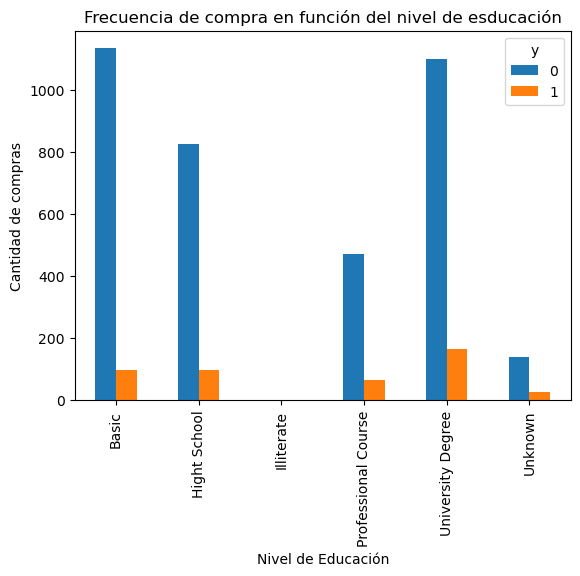

In [247]:
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de esducación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Cantidad de compras")

In [248]:
table = pd.crosstab(data.marital, data.y)
table

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [251]:
table.sum(1) #Suma de filas

marital
divorced     446
married     2509
single      1153
unknown       11
dtype: int64

In [253]:
table.sum(0) #Suma de columnas

y
0    3668
1     451
dtype: int64

In [256]:
table.div(table.sum(1).astype(float),axis=0) #Proporción de filas

y,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Proporción de clientes')

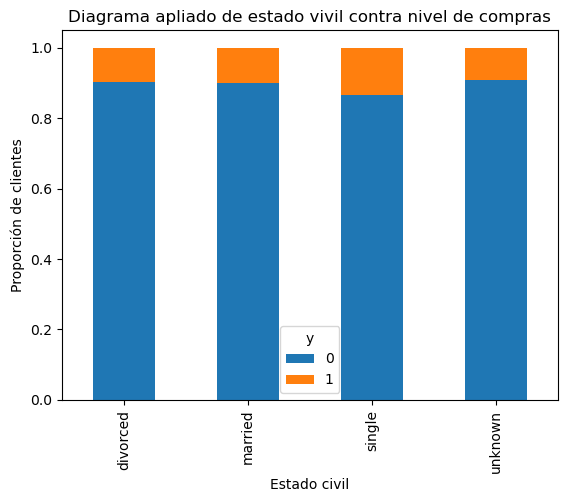

In [258]:
table.div(table.sum(1).astype(float),axis=0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apliado de estado vivil contra nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")
